In [2]:
#Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as pt
import seaborn as sns


In [82]:
train = pd.read_csv(r"E:\Python All in One\DATA_SETS\Kaggler\Competition\House Prices\train.csv", index_col = 'Id')

test = pd.read_csv(r"E:\Python All in One\DATA_SETS\Kaggler\Competition\House Prices\test.csv", index_col = 'Id')

In [83]:
train.shape

(1460, 80)

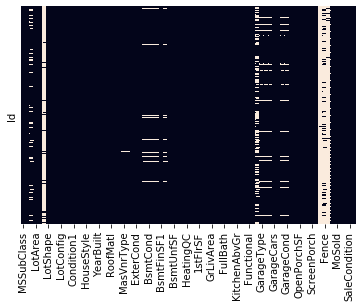

In [84]:
sns.heatmap(train.isnull(), yticklabels = False, cbar = False)

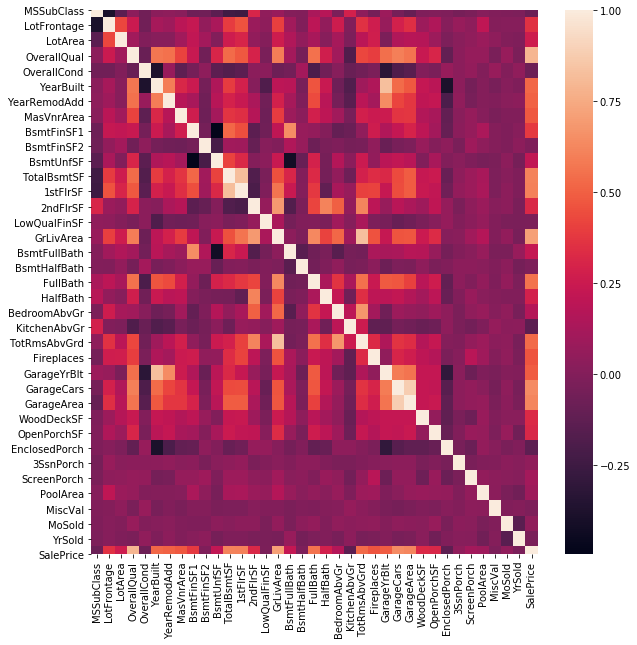

In [85]:
pt.figure(figsize = (10,10))
sns.heatmap(train.corr(), )

In [95]:
# Dropping columns with missing values
cols = [col for col in train.columns if train[col].isnull().any()]

train.drop(cols, axis = 1, inplace = True)
test.drop(cols, axis = 1, inplace = True)

x = train.iloc[:, :-1]
y = train.iloc[:, -1]

In [97]:
x.shape

(1460, 60)

In [98]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, random_state = 0)

In [99]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

def score(x_train, x_test, y_train, y_test):
    model = RandomForestRegressor(n_estimators = 100, criterion = 'mae', random_state = 0)
    model.fit(x_train, y_train)
    y_preds = model.predict(x_test)
    return mean_absolute_error(y_test, y_preds)

In [100]:
# One Hot Encoding
object_cols = [cols for cols in x_train.columns if x_train[cols].dtype=='object']

low_cardinality = [cols for cols in object_cols if x_train[cols].nunique()<10]

high_cardinality = list(set(object_cols)-set(low_cardinality))

In [101]:
print("Columns that will be One Hot Encoded : \n", low_cardinality)
print("Columns that will be Rejected due to High Cardinality : \n", high_cardinality)

Columns that will be One Hot Encoded : 
 ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'ExterQual', 'ExterCond', 'Foundation', 'Heating', 'HeatingQC', 'CentralAir', 'KitchenQual', 'Functional', 'PavedDrive', 'SaleType', 'SaleCondition']
Columns that will be Rejected due to High Cardinality : 
 ['Neighborhood', 'Exterior2nd', 'Exterior1st']


In [102]:
x_train = x_train.drop(high_cardinality, axis = 1)
x_test = x_test.drop(high_cardinality, axis = 1)

In [103]:
x_train.shape

(1168, 57)

In [104]:
from sklearn.preprocessing import OneHotEncoder
onehot = OneHotEncoder(sparse = False, handle_unknown = 'ignore')

OH_xtrain_col = pd.DataFrame(onehot.fit_transform(x_train[low_cardinality]))
OH_xtest_col = pd.DataFrame(onehot.transform(x_test[low_cardinality]))

#One hot encoder removes the index , lets solve it
OH_xtrain_col.index = x_train.index
OH_xtest_col.index = x_test.index

#Bringing out numeric data from training data set

num_x_train = x_train.select_dtypes(exclude = ['object'])
num_x_test = x_test.select_dtypes(exclude = ['object'])


OH_x_train = pd.concat([num_x_train, OH_xtrain_col], axis = 1)
OH_x_test = pd.concat([num_x_test, OH_xtest_col], axis = 1)



In [106]:
OH_x_train.shape

(1168, 155)

In [72]:
print(score(OH_x_train, OH_x_test, y_train, y_test))

17546.46815068493


In [121]:
#Collecting the Categorical Variables
cat_col = [col for col in test.columns if test[col].dtype == 'object']
for i in cat_col:
    test[i].fillna((test[i].value_counts().index[0]), inplace =True)

In [132]:
#Collecting The numerical variables
num_col = [col for col in test.columns if test[col].dtype in ['int64', 'float64']]
for i in num_col:
    test[i].fillna(test[i].mean(), inplace = True)

In [134]:
test.shape

(1459, 60)

In [135]:
# One Hot Encoding
object_cols = [cols for cols in test.columns if test[cols].dtype=='object']

low_cardinality = [cols for cols in object_cols if test[cols].nunique()<10]

high_cardinality = list(set(object_cols)-set(low_cardinality))

In [137]:
test.drop(high_cardinality, axis = 1, inplace = True)

In [138]:
test.shape

(1459, 57)

In [139]:
from sklearn.preprocessing import OneHotEncoder
onehot_test = OneHotEncoder(sparse = False, handle_unknown = 'ignore')

OH_xtest_col = pd.DataFrame(onehot_test.fit_transform(test[low_cardinality]))
#One hot encoder removes the index , lets solve it
OH_xtest_col.index = test.index

#Bringing out numeric data from training data set

num_x_test = test.select_dtypes(exclude = ['object'])


OH_x_test = pd.concat([num_x_test, OH_xtest_col], axis = 1)


In [148]:
pd.DataFrame([OH_x_train.columns, OH_x_test.columns])

,0,1,2,3,4,5,6,7,8,9,...,145,146,147,148,149,150,151,152,153,154
0,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,112,113,114,115.0,116.0,117.0,118.0,119.0,120.0,121.0
1,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,112,113,114,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [155]:
OH_xtest_col.shape

(1459, 115)